In [1]:
import pandas as pd
df=pd.read_csv('/home/sriaparna/AI/energy_forecast/AEP_hourly.csv')
print(df.head(10))
print(df.info())

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0
5  2004-12-31 06:00:00  13038.0
6  2004-12-31 07:00:00  13692.0
7  2004-12-31 08:00:00  14297.0
8  2004-12-31 09:00:00  14719.0
9  2004-12-31 10:00:00  14941.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None


/home/sriaparna/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sriaparna/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
if df.index.name == 'Datetime':
    df = df.reset_index()

In [3]:
df['Datetime']=pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)
print(df.head())
print(df.dtypes)

             Datetime   AEP_MW
0 2004-10-01 01:00:00  12379.0
1 2004-10-01 02:00:00  11935.0
2 2004-10-01 03:00:00  11692.0
3 2004-10-01 04:00:00  11597.0
4 2004-10-01 05:00:00  11681.0
Datetime    datetime64[ns]
AEP_MW             float64
dtype: object


In [4]:
print(df.isnull().sum())

Datetime    0
AEP_MW      0
dtype: int64


In [5]:
time_diffs = df['Datetime'].diff().value_counts()

print("Frequency of time gaps:")
print(time_diffs)

Frequency of time gaps:
Datetime
0 days 01:00:00    121241
0 days 02:00:00        27
0 days 00:00:00         4
Name: count, dtype: int64


In [6]:

df = df.drop_duplicates(subset='Datetime')
df = df.set_index('Datetime').sort_index()
perfect_index=pd.date_range(start=df.index.min(),end=df.index.max(),freq='H')
df=df.reindex(perfect_index)
df['AEP_MW'] = df['AEP_MW'].interpolate(method='linear')
new_gaps=df.index.to_series().diff().value_counts()
print(new_gaps)

/tmp/ipykernel_9717/1185646485.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  perfect_index=pd.date_range(start=df.index.min(),end=df.index.max(),freq='H')


0 days 01:00:00    121295
Name: count, dtype: int64


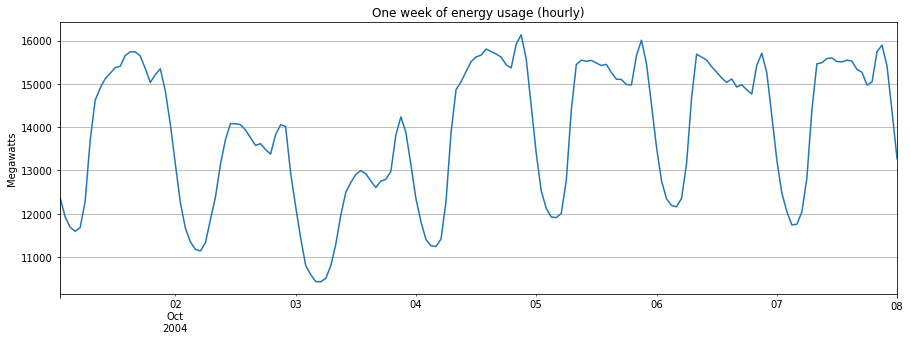

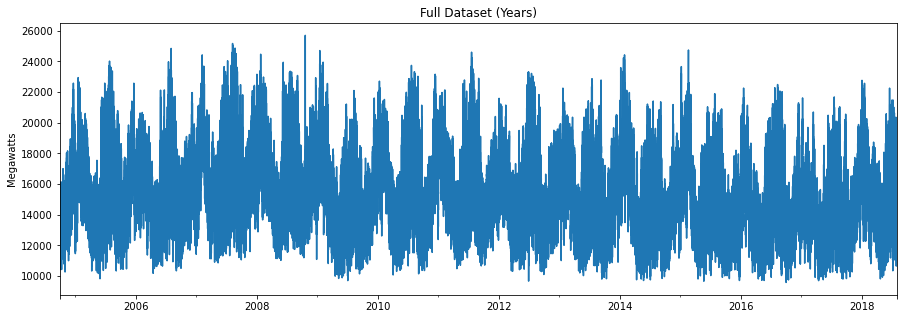

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
df.iloc[:168]['AEP_MW'].plot(title='One week of energy usage (hourly)')
plt.ylabel('Megawatts')
plt.grid('True')
plt.show()

plt.figure(figsize=(15, 5))
df['AEP_MW'].plot(title='Full Dataset (Years)')
plt.ylabel('Megawatts')
plt.show()

In [8]:
def create_features(df):
    df=df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)
print(df.head())

                      AEP_MW  hour  dayofweek  quarter  month  year  dayofyear
2004-10-01 01:00:00  12379.0     1          4        4     10  2004        275
2004-10-01 02:00:00  11935.0     2          4        4     10  2004        275
2004-10-01 03:00:00  11692.0     3          4        4     10  2004        275
2004-10-01 04:00:00  11597.0     4          4        4     10  2004        275
2004-10-01 05:00:00  11681.0     5          4        4     10  2004        275


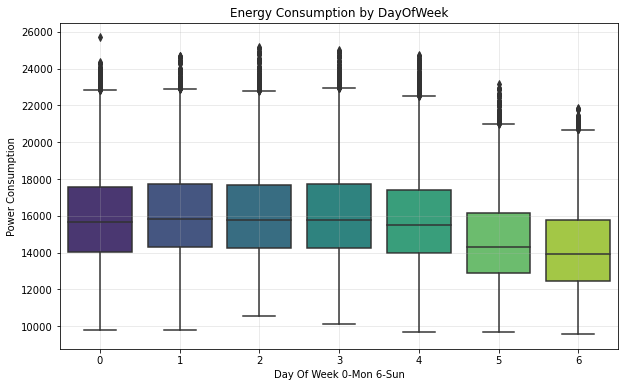

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='dayofweek',y='AEP_MW',palette='viridis')
plt.title('Energy Consumption by DayOfWeek')
plt.xlabel('Day Of Week 0-Mon 6-Sun')
plt.ylabel('Power Consumption')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
df['lag_1h'] = df['AEP_MW'].shift(1) 
df['lag_24h']=df['AEP_MW'].shift(24)
df['rolling_mean_24h'] = df['AEP_MW'].transform(lambda x: x.rolling(window=24).mean())
df['rolling_std_24h'] = df['AEP_MW'].transform(lambda x: x.rolling(window=24).std())
df = df.dropna()
print(df[['AEP_MW', 'lag_1h', 'lag_24h', 'rolling_mean_24h']].head())

                      AEP_MW   lag_1h  lag_24h  rolling_mean_24h
2004-10-02 01:00:00  12260.0  13147.0  12379.0      14232.166667
2004-10-02 02:00:00  11672.0  12260.0  11935.0      14221.208333
2004-10-02 03:00:00  11352.0  11672.0  11692.0      14207.041667
2004-10-02 04:00:00  11177.0  11352.0  11597.0      14189.541667
2004-10-02 05:00:00  11142.0  11177.0  11681.0      14167.083333


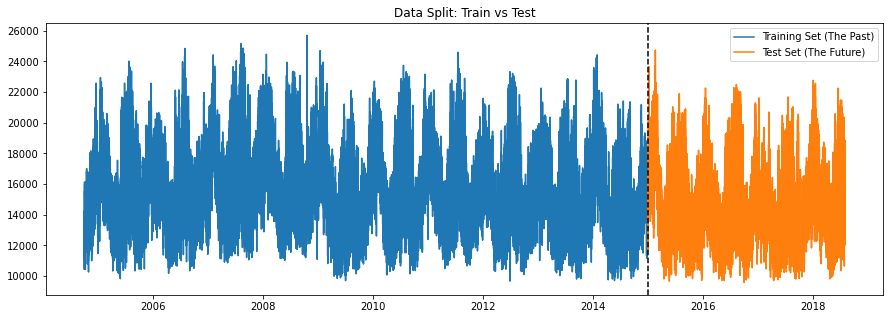

In [11]:
import numpy as np
split_date = '2015-01-01'
train=df.loc[df.index<split_date]
test=df.loc[df.index>=split_date]
plt.figure(figsize=(15, 5))
plt.plot(np.array(train.index), train['AEP_MW'].values, label='Training Set (The Past)')
plt.plot(np.array(test.index), test['AEP_MW'].values, label='Test Set (The Future)')
plt.axvline(pd.to_datetime(split_date), color='black', ls='--')
plt.title('Data Split: Train vs Test')
plt.legend()
plt.show()

In [12]:
FEATURES=['hour', 'dayofweek', 'quarter', 'month', 'year', 
            'lag_1h', 'lag_24h', 'rolling_mean_24h']
TARGET=['AEP_MW']
X_train=train[FEATURES].values
y_train=train[TARGET].values

X_test=test[FEATURES].values
y_test=test[TARGET].values
print(f"Ready! Training on {len(X_train)} hours and testing on {len(X_test)} hours.")

Ready! Training on 89831 hours and testing on 31441 hours.


In [13]:
import xgboost as xgb
reg=xgb.XGBRegressor(
n_estimators=1000,
learning_rate=0.01,
max_depth=3,
objective='reg:squarederror')
reg.fit(X_train,y_train)
print('Training complete')

Training complete


In [14]:
%pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
test['prediction']=reg.predict(X_test)
print(test[['AEP_MW', 'prediction']].head())

                      AEP_MW    prediction
2015-01-01 00:00:00  16375.0  16166.425781
2015-01-01 01:00:00  16172.0  15803.672852
2015-01-01 02:00:00  15968.0  15808.767578
2015-01-01 03:00:00  15749.0  15936.835938
2015-01-01 04:00:00  15727.0  15804.588867


/tmp/ipykernel_9717/1668231423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=reg.predict(X_test)


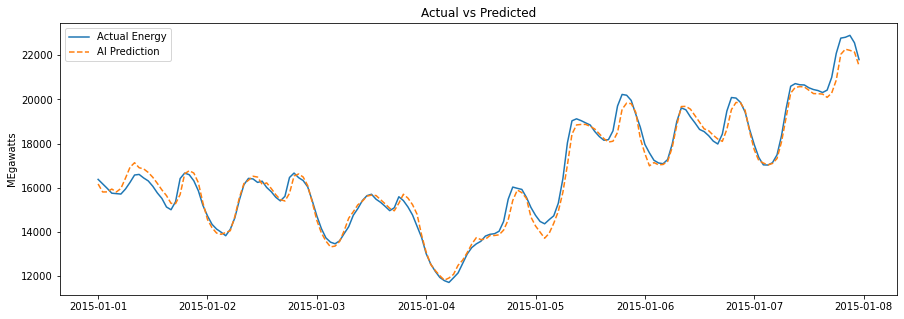

In [16]:
plt.figure(figsize=(15,5))
plt.plot(np.array(test.index[:168]), test['AEP_MW'].values[:168], label='Actual Energy')
plt.plot(np.array(test.index[:168]), test['prediction'].values[:168], label='AI Prediction', ls='--')
plt.title('Actual vs Predicted')
plt.ylabel('MEgawatts')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error

score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))

print(f'Final RMSE Score: {score:0.2f} MW')

Final RMSE Score: 311.13 MW


In [18]:
test['error']=test['AEP_MW']-test['prediction']
test['abs_error'] = test['error'].abs()

/tmp/ipykernel_9717/4077901132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error']=test['AEP_MW']-test['prediction']
/tmp/ipykernel_9717/4077901132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['abs_error'] = test['error'].abs()


In [19]:
worst_days = test.sort_values('abs_error', ascending=False).head(10)
print("--- The AI's Biggest Mistakes ---")
print(worst_days[['AEP_MW', 'prediction', 'abs_error']])

--- The AI's Biggest Mistakes ---
                      AEP_MW    prediction    abs_error
2015-12-27 14:00:00  15488.0  12418.247070  3069.752930
2015-12-27 15:00:00  12413.0  15271.274414  2858.274414
2018-04-24 01:00:00  10158.0  11876.747070  1718.747070
2018-04-18 11:00:00  14558.0  16090.921875  1532.921875
2018-04-25 01:00:00  11979.0  10567.572266  1411.427734
2018-07-04 07:00:00  12789.0  14123.273438  1334.273438
2015-02-15 19:00:00  20358.0  19046.875000  1311.125000
2015-02-05 19:00:00  20078.0  18802.837891  1275.162109
2015-02-18 19:00:00  22056.0  20838.347656  1217.652344
2015-01-07 18:00:00  22085.0  20873.242188  1211.757812


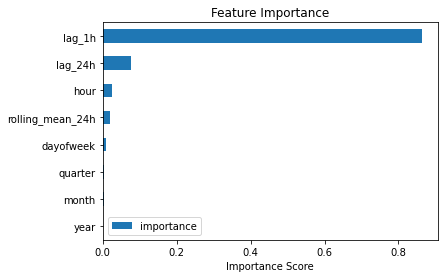

In [20]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=FEATURES,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.xlabel('Importance Score')
plt.show()

In [21]:
reg.save_model('energy_model.json')

In [22]:
import joblib
joblib.dump(reg, 'energy_xgb_model.pkl')
test.iloc[-1:].to_csv('last_known_point.csv', index=False)